# 趣味实战项目：AI 给文字区域打马赛克（图像）

解析文本区域检测器的结果，用 OpenCV 将文字区域打上马赛克。


## 进入 MMOCR 主目录

In [1]:
import os
os.chdir('./mmocr')
os.listdir()

['.git',
 '.circleci',
 '.codespellrc',
 '.coveragerc',
 '.github',
 '.gitignore',
 '.owners.yml',
 '.pre-commit-config.yaml',
 '.pylintrc',
 '.readthedocs.yml',
 'CITATION.cff',
 'LICENSE',
 'MANIFEST.in',
 'README.md',
 'README_zh-CN.md',
 'configs',
 'demo',
 'docker',
 'docs',
 'mmocr',
 'model-index.yml',
 'requirements.txt',
 'requirements',
 'resources',
 'setup.cfg',
 'setup.py',
 'tests',
 'tools',
 'mmocr.egg-info',
 'data',
 'font.TTF',
 'INFO',
 'outputs']

# 导入工具包

In [2]:
# 导入 opencv-python
import cv2

import numpy as np

# 导入可视化工具包 matplotlib，并让绘制的图像嵌入在 notebook 中
import matplotlib.pyplot as plt
%matplotlib inline

# 定义可视化图像函数，输入图像路径，可视化图像
def show_img_from_path(img_path):
    '''opencv 读入图像，matplotlib 可视化格式为 RGB，因此需将 BGR 转 RGB，最后可视化出来'''
    img = cv2.imread(img_path)
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()
    
# 定义可视化图像函数，输入图像 array，可视化图像
def show_img_from_array(img):
    '''输入 array，matplotlib 可视化格式为 RGB，因此需将 BGR 转 RGB，最后可视化出来'''
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

In [3]:
# 导入 MMOCR
from mmocr.utils.ocr import MMOCR

/environment/miniconda3/lib/python3.7/site-packages/mmdet/datasets/pipelines/formating.py:7: UserWarning: DeprecationWarning: mmdet.datasets.pipelines.formating will be deprecated, please replace it with mmdet.datasets.pipelines.formatting.
  warnings.warn('DeprecationWarning: mmdet.datasets.pipelines.formating will be '


## 导入文本区域检测模型

In [4]:
detector = MMOCR(det='TextSnake',  # 文本区域检测算法 
                 recog=None,       # 文本内容识别算法，这里不指定
                 device='cpu')     # 指定运算设备为 cpu 或 cuda

load checkpoint from http path: https://download.openmmlab.com/mmocr/textdet/textsnake/textsnake_r50_fpn_unet_1200e_ctw1500-27f65b64.pth


## 复习一下【B】代码教程，解析文本区域检测结果

In [5]:
input_path = 'demo/demo_text_det.jpg'

In [6]:
result = detector.readtext(input_path)

/environment/miniconda3/lib/python3.7/site-packages/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


In [8]:
# 文本区域个数
len(result[0]['boundary_result'])

9

In [9]:
# 索引为1的区域
len(result[0]['boundary_result'][1])

415

In [10]:
# 列表最后一位为文本区域置信度
result[0]['boundary_result'][1][-1]

0.9065865740110974

索引为 idx 的文字区域 点坐标：x1, y1, x2, y2, x3, y3, ..., xn, yn

In [11]:
# 选择索引为 idx 的文字区域
idx = 0

In [12]:
result[0]['boundary_result'][idx][:10]

[180.700901389122,
 202.125,
 180.32600325345993,
 202.5,
 178.82641071081161,
 202.5,
 178.45151257514954,
 202.875,
 177.70171630382538,
 202.875]

In [13]:
# 索引为 idx 的文字区域 置信度
result[0]['boundary_result'][idx][-1]

0.9489858788784629

## 整理索引为`idx`的文字区域点坐标矩阵

In [14]:
point_coords = np.array(result[0]['boundary_result'][idx][:-1]).reshape(-1,2)

In [15]:
point_coords.shape

(376, 2)

In [16]:
point_coords[:10]

array([[180.70090139, 202.125     ],
       [180.32600325, 202.5       ],
       [178.82641071, 202.5       ],
       [178.45151258, 202.875     ],
       [177.7017163 , 202.875     ],
       [176.5770219 , 204.        ],
       [176.20212376, 204.        ],
       [176.20212376, 204.375     ],
       [175.07742935, 205.5       ],
       [175.07742935, 206.25      ]])

In [16]:
point_coords = np.array([point_coords], dtype=np.int32)

In [17]:
point_coords.shape

(1, 376, 2)

## 给索引为`idx`的文字区域打马赛克

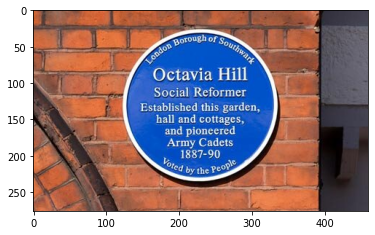

In [18]:
# 读入原图
img = cv2.imread(input_path)
# 展示原图
show_img_from_array(img)

In [19]:
img.shape

(276, 460, 3)

In [20]:
# 多边形填充
cv2.fillPoly(img, point_coords, (0,255,0));

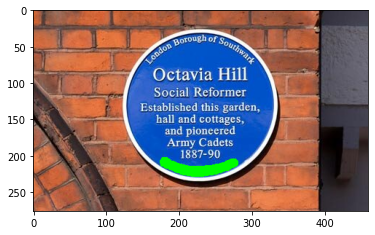

In [21]:
show_img_from_array(img)

# 完整马赛克填充

In [22]:
for each in result[0]['boundary_result']: # 遍历每片文字区域
    if each[-1] > 0.5: # 置信度阈值
        point_coords = np.array(each[:-1]).reshape(-1,2)
        point_coords = np.array([point_coords], dtype = np.int32)
        cv2.fillPoly(img, point_coords, (0,255,0)) # 多边形填充，颜色为 (蓝，绿，红)
    else:
        pass

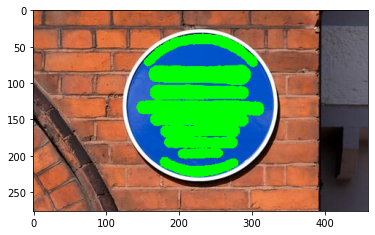

In [23]:
show_img_from_array(img)

# 完整代码

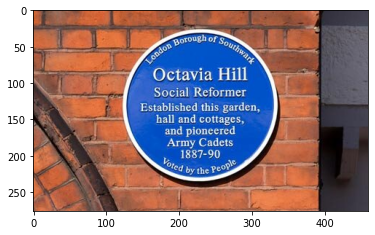

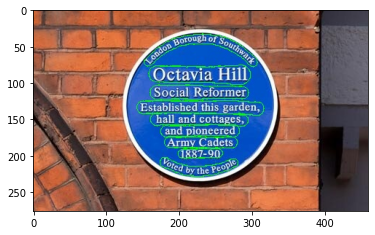

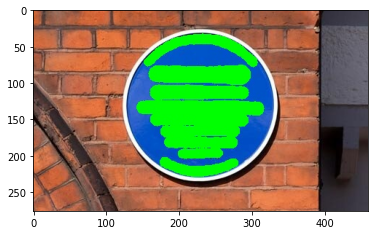

In [24]:
input_path = 'demo/demo_text_det.jpg'
output_path = input_path.split('.')[-2] + '-out.jpg'
mosaic_path = input_path.split('.')[-2] + '-mosaic.jpg'
img = cv2.imread(input_path)
result = detector.readtext(input_path, output=output_path)


for each in result[0]['boundary_result']: # 遍历每个文字区域
    if each[-1] > 0.5: # 置信度阈值
        point_coords = np.array(each[:-1]).reshape(-1,2)
        point_coords = np.array([point_coords], dtype = np.int32)
        cv2.fillPoly(img, point_coords, (0,255,0)) # 多边形填充
    else:
        print('有一片文字区域置信度为{:.2f}，小于阈值，不打码'.format(each[-1]))

cv2.imwrite(mosaic_path, img)
show_img_from_path(input_path)
show_img_from_path(output_path)
show_img_from_path(mosaic_path)

# 封装函数

In [25]:
def process_frame(input_path):
    output_path = input_path.split('.')[-2] + '-out.jpg'
    mosaic_path = input_path.split('.')[-2] + '-mosaic.jpg'

    img = cv2.imread(input_path)
    result = detector.readtext(input_path, output=output_path)

    for each in result[0]['boundary_result']: # 遍历每个文字区域
        if each[-1] > 0.2: # 置信度阈值
            point_coords = np.array(each[:-1]).reshape(-1,2)
            point_coords = np.array([point_coords], dtype = np.int32)
            cv2.fillPoly(img, point_coords, (0,255,0)) # 多边形填充
        else:
            print('有一片文字区域置信度为{:.2f}，小于阈值，不打码'.format(each[-1]))

    cv2.imwrite(mosaic_path, img)
    show_img_from_path(input_path)
    show_img_from_path(output_path)
    show_img_from_path(mosaic_path)

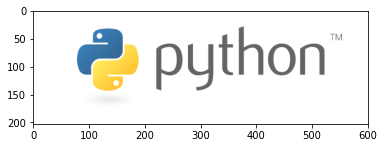

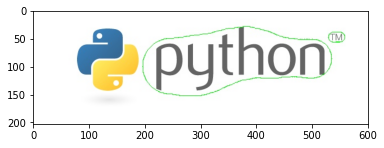

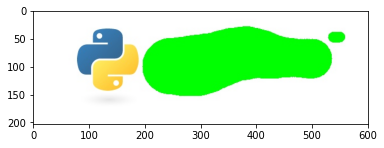

In [26]:
process_frame('demo/python-logo.png')

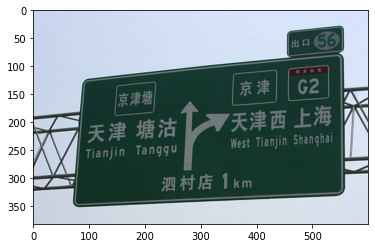

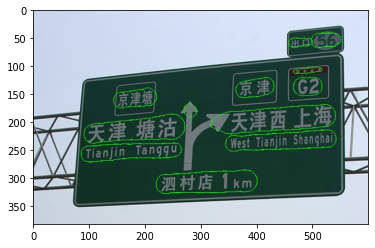

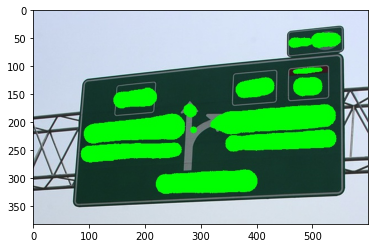

In [27]:
process_frame('demo/highway.jpg')